In [ ]:
import pandas as pd

# Loading the dataset into a dataframe
data_frame = pd.read_csv('climate_action_data.csv')
display(data_frame.head())

In [ ]:
# Checking for empty cells
data_frame.isnull().sum()

#Print data frame information
print('\nData frame information before cleaning')
data_frame.info()


In [ ]:
import pandas as pd
import numpy as np

#Loading the dataset into a dataframe
data_frame = pd.read_csv("climate_action_data.csv")

# Rename columns for easier use
data_frame.rename(columns={
    'Soil_Moisture(%)': 'Soil_Moisture_Percent',
    'Soil_pH': 'Soil_pH', # Already fine, but listed for clarity
    'Temperature(C)': 'Temperature_Celsius',
    'Humidity(%)': 'Humidity_Percent',
    'Fertilizer_Recommended(kg/ha)': 'Fertilizer_Recommended_kg_per_ha',
    'Irrigation_Recommended(mm)': 'Irrigation_Recommendation_mm'
}, inplace=True)

#Converting Date column to datetime objects, errors='coerce' turns unparseable dates into NaT
data_frame['Date'] = pd.to_datetime(data_frame['Date'], errors='coerce')

#These columns are supposed to be numeric but they are non
cols_to_numeric = ['Soil_Moisture_Percent', 'Soil_pH','Temperature_Celsius',
                  'Humidity_Percent', 'Fertilizer_Recommended_kg_per_ha', 'Irrigation_Recommendation_mm']

#Converting these columns to numeric
for col in cols_to_numeric:
    data_frame[col] = pd.to_numeric(data_frame[col], errors='coerce')

#Handling missing values
#Droping rows where Date is not NaT
data_frame.dropna(subset=['Date'], inplace=True)

#Drop rows where any of the numeric columns have NaN values after conversion
data_frame.dropna(subset=cols_to_numeric, inplace=True)

#Drop rows where crop_type is missing
data_frame.dropna(subset=['Crop_Type'], inplace=True)

#Data frame info after cleaning
print('\nData frame information after cleaning')
data_frame.info()

#Descriptive statistics after cleaning
print('\nDataframe Descriptive statistics after cleaning')
print(data_frame.describe())

print("\nValue counts for Crop_Type after cleaning:")
print(data_frame['Crop_Type'].value_counts())

#Saving the cleaned data to a new csv file
data_frame.to_csv("cleaned_climate_action_data.csv", index=False)
print("\nCleaned data saved to 'cleaned_climate_action_data.csv'")


Histograms for each numeric column


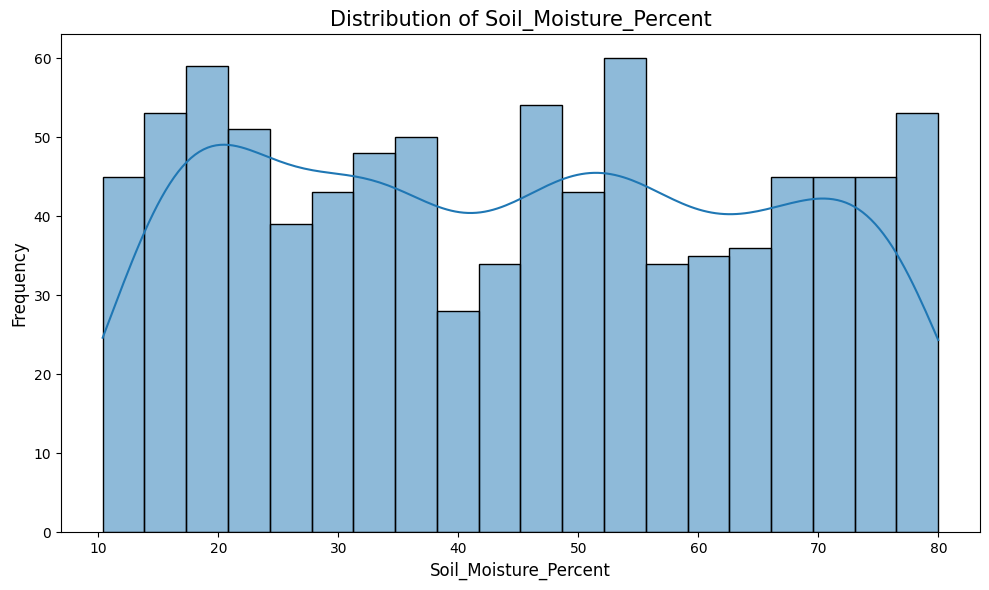

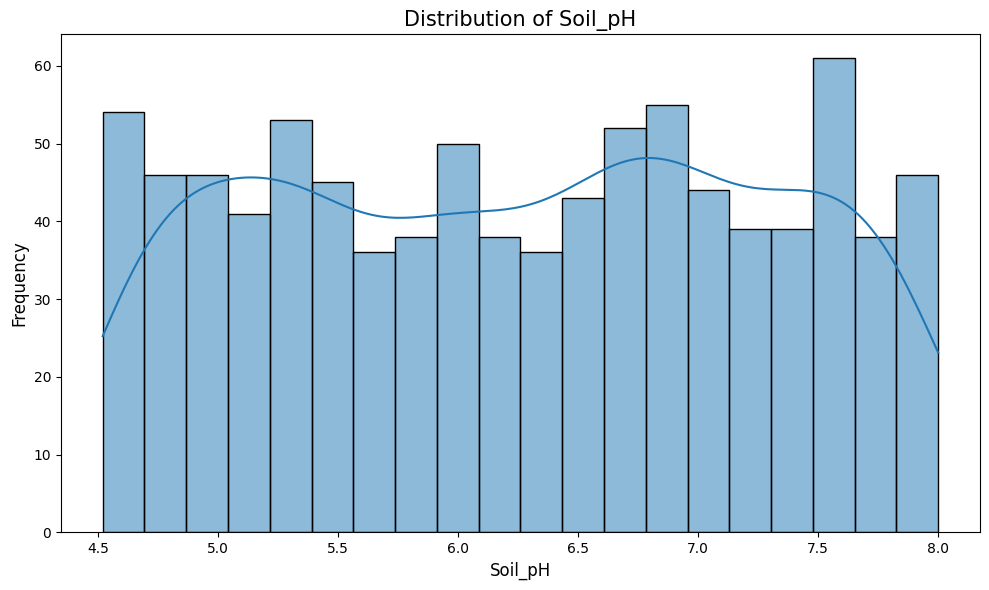

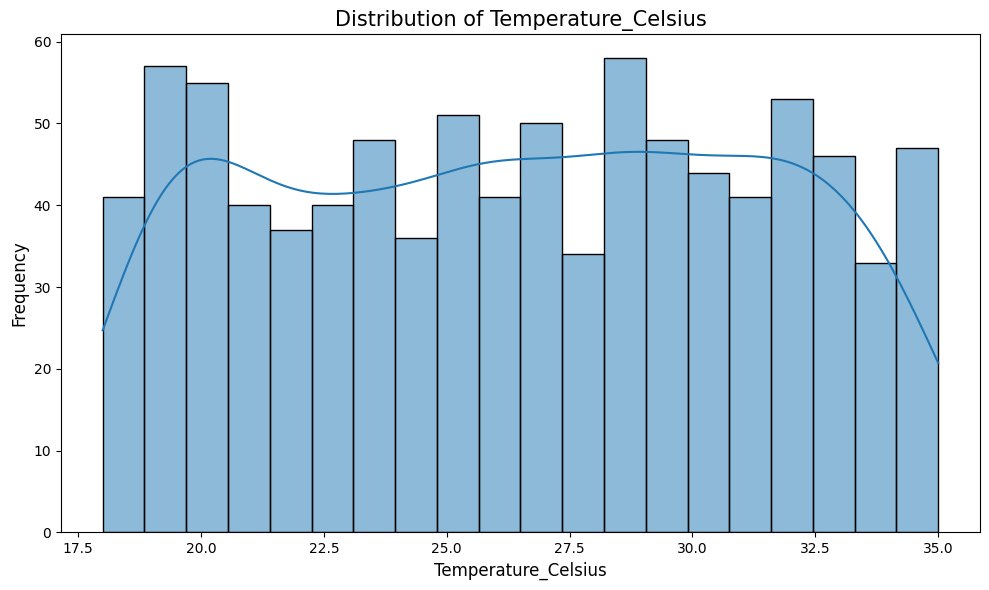

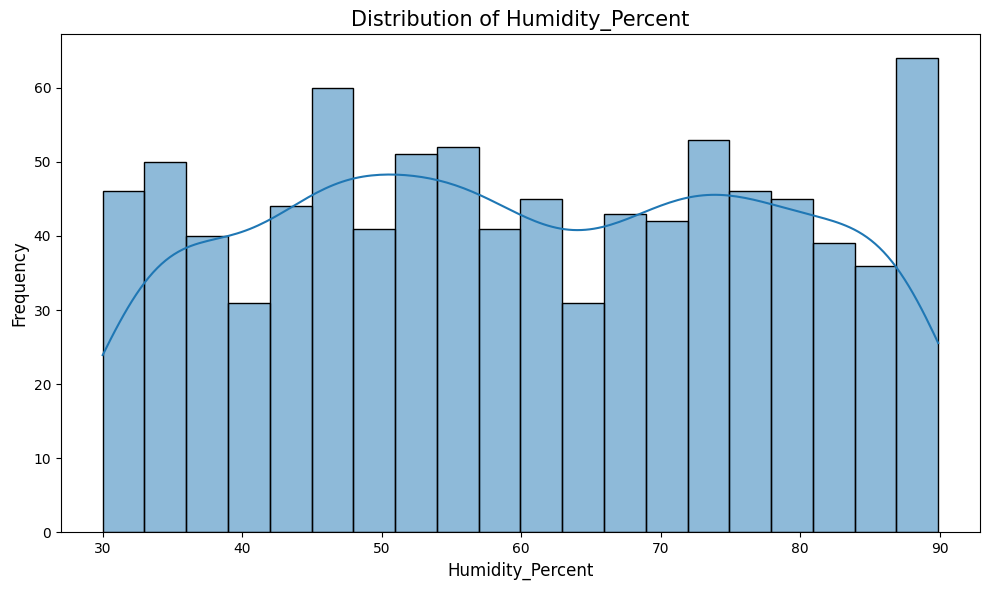

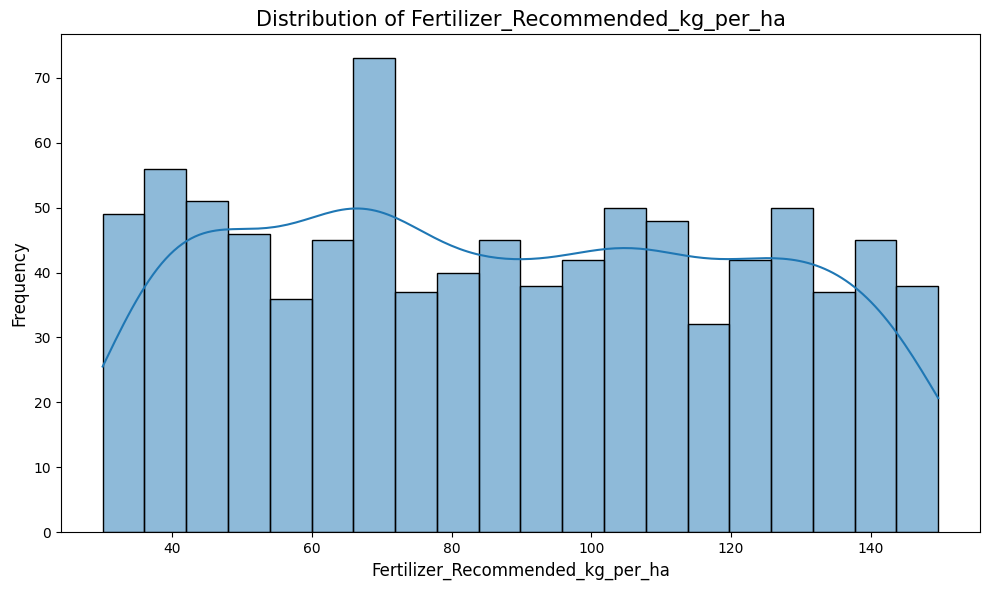

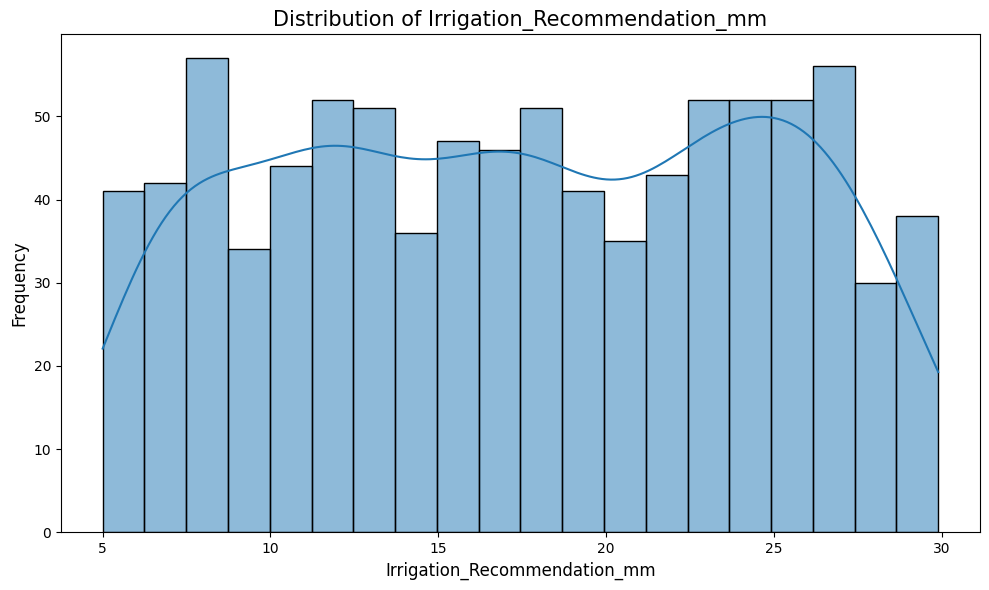

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

new_data_frame = pd.read_csv('cleaned_precision_agriculture_data.csv')

numerical_cols = ['Soil_Moisture_Percent', 'Soil_pH','Temperature_Celsius',
                'Humidity_Percent', 'Fertilizer_Recommended_kg_per_ha', 'Irrigation_Recommendation_mm']

#check if the columns exist in the cleaned dataset
missing_cols = [col for col in numerical_cols if col not in new_data_frame.columns]
if missing_cols:
    print(f"Error: The following columns are missing from the cleaned dataset: {missing_cols}")
    print(f"Columns available: {new_data_frame.columns.tolist()}")

    exit() # if columns are missing

    plt.style.use('seaborn-v0_8-whitegrid')

#Histograms for numeric variables
print("\nHistograms for each numeric column")
for column in numerical_cols:
    plt.subplots(figsize=(10, 6))
    sns.histplot(new_data_frame[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}", fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.tight_layout()
    plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

new_data_frame = pd.read_csv('cleaned_precision_agriculture_data.csv')

# Drop the non-numeric columns for correlation
df_numeric = new_data_frame.select_dtypes(include=["float64", "int64"])

# computing correlation matrix
corr = df_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="inferno", fmt=".2f", linewidth=0.5)
plt.title("Correlation heatmap between soil and environmental variables")
plt.show()


In [ ]:
# Drop the non-numeric columns for correlation
df_numeric = new_data_frame.select_dtypes(include=["float64", "int64"])
# Calculate correlations with fertilizer recommendation
correlations = df_numeric.corr()["Fertilizer_Recommended_kg_per_ha"].sort_values(ascending=False)

# Show top correlated variables (excluding self-correlation)
print("\nHow the variables influence fertilizer recommendation")
print(correlations.drop("Fertilizer_Recommended_kg_per_ha"))

Soil_pH                         0.074111
Humidity_Percent                0.017732
Soil_Moisture_Percent           0.010945
Temperature_Celsius             0.001084
Irrigation_Recommendation_mm   -0.004874
Name: Fertilizer_Recommended_kg_per_ha, dtype: float64


In [26]:
# Calculating average soil moisture per crop type
avg_soil_moisture = new_data_frame.groupby("Crop_Type")["Soil_Moisture_Percent"].mean().sort_values(ascending=False)

# Identify the crop with the highest value
top_crop = avg_soil_moisture.idxmax()
top_value = avg_soil_moisture.max()

print(f"Crop with highest average soil moisture: {top_crop} ({top_value:.2f}%)")

Crop with highest average soil moisture: Wheat (46.73%)


In [ ]:
# Filter crops with avg temperature > 30°C
high_temp_df = new_data_frame[new_data_frame["Temperature_Celsius"] > 30]

# Average irrigation recommendation for these crops
avg_irrigation = high_temp_df.groupby("Crop_Type")["Irrigation_Recommendation_mm"].mean().sort_values(ascending=False)
print("\nIrrigation recommendations for crops at temps > 30")
print(avg_irrigation)


Crop_Type
Beans       18.182258
Lettuce     16.483333
Maize       16.590476
Tomatoes    18.897917
Wheat       18.882927
Name: Irrigation_Recommendation_mm, dtype: float64


In [ ]:
# From my analysis, Soil_pH, Soil_moisture_percent and
# Humidity_Percent most influence fertilzer recommendations.

# The crop type with the highest average soil moisture
#is Wheat with soil_moisture_percent: 46.73%

#Irrigation recommendation for each crop at temps > 30
#Crop_Type
# Beans       18.182258
    #I would recommend a slight increase in irrigation.
# Lettuce     16.483333
     #I would recommend a high increase in irrigation since it is very sensitive to heat.
# Maize       16.590476
     #I would recommend a slight increase in irrigation especially during reproductive stages.
# Tomatoes    18.897917
     #I would recommend maintaining the current level of irrigation.
# Wheat       18.882927
     #I would recommend a slight increase or maintain in irrigation.

## INSIGHTS AND RECOMMENDATIONS
# Variables such as Soil_pH, Soil_moisture_percent and
# Humidity_Percent show the strongest correlations with Fertilizer_Recommended_kg_per_ha.
    # For example, Soils that have low pH (acidic) may negatively correlate implying more fertilizer needed.
    # High soil moisture increase nutrient availability, potentially reducing fertilizer need.
# All crops fall between 16.48 mm and 18.90 mm, suggesting that a uniform irrigation approach is being used.

# At 16.48 mm, lettuce has the lowest irrigation, despite being highly sensitive to both heat and water stress.
    # It may be under-irrigated, especially in >30°C conditions, which can lead to:
        # Wilting
        # Bolting (premature flowering)
        # Reduced yield and quality
# Tomatoes top the list with 18.90 mm, which is appropriate under heat stress.

# Both cereals crops (Maize, Wheat) are given ~18 mm, which seems high for heat-tolerant, deeper-rooted crops.

